In [305]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix,accuracy_score

In [306]:
df=pd.read_excel("Copy of loan.xlsx")
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


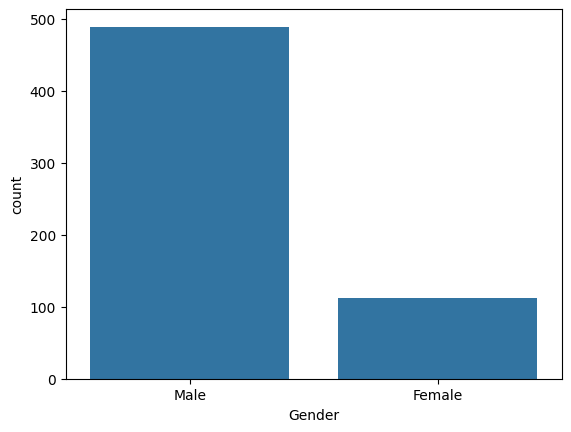

In [307]:
df["Gender"].value_counts()
sns.countplot(x="Gender",data=df)
plt.show() 

In [308]:
df["Genders"]=df["Gender"].map({"Male": 1, "Female": 0})
df["Married1"]=df["Married"].map({"Yes": 1, "No": 0})
df["Self_Employed11"]=df["Self_Employed"].map({"Yes": 1, "No": 0})
df["Loan_Status1"]=df["Loan_Status"].map({"Y": 1, "N": 0})
df["Property1"]=df["Property_Area"].map({"Urban": 1, "Semiurban": 2, "Rural": 3})
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())

In [309]:
df["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [310]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Genders,Married1,Self_Employed11,Loan_Status1,Property1
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,1.0,0.0,0.0,1,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1.0,1.0,0.0,0,3
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1.0,1.0,1.0,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1.0,1.0,0.0,1,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,1.0,0.0,0.0,1,1


In [311]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Genders,Married1,Self_Employed11,Loan_Status1,Property1
count,614.000000,614.000000,614.000000,600.00000,564.000000,601.000000,611.000000,582.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.813644,0.651391,0.140893,0.687296,1.962541
std,6109.041673,2926.248369,84.037468,65.12041,0.364878,0.389718,0.476920,0.348211,0.463973,0.787482
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [312]:
df["TotalIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df["Loan_Income_Ratio"] = df["LoanAmount"] / (df["TotalIncome"] + 1)

df["LoanAmount_per_ApplicantIncome"] = df["LoanAmount"] / (df["ApplicantIncome"] + 1)


In [313]:
import numpy as np

df["ApplicantIncome"] = np.log1p(df["ApplicantIncome"])
df["CoapplicantIncome"] = np.log1p(df["CoapplicantIncome"])
df["LoanAmount"] = np.log1p(df["LoanAmount"])


In [314]:
features= ["Married1",
    "Self_Employed11",
    "Property1",
    "LoanAmount",
    "ApplicantIncome",
    "CoapplicantIncome",
    "TotalIncome",
    "Loan_Income_Ratio",
    "LoanAmount_per_ApplicantIncome"]
x=df[features]
y=df["Loan_Status1"]

In [315]:
x.isna().sum()

x["Married1"].fillna(x["Married1"].mode()[0], inplace=True)
x["Self_Employed11"].fillna(x["Self_Employed11"].mean(), inplace=True)


C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_3904\654834628.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x["Married1"].fillna(x["Married1"].mode()[0], inplace=True)
C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_3904\654834628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Married1"].fillna(x["Married1"].mode()[0], inplace

In [316]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
X = imputer.fit_transform(x)


In [317]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [318]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
   n_estimators=800,
    max_depth=12,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7317073170731707


In [319]:
print(y.value_counts())


Loan_Status1
1    422
0    192
Name: count, dtype: int64


In [320]:
df["Loan_Status1"].value_counts(normalize=True) * 100


Loan_Status1
1    68.729642
0    31.270358
Name: proportion, dtype: float64

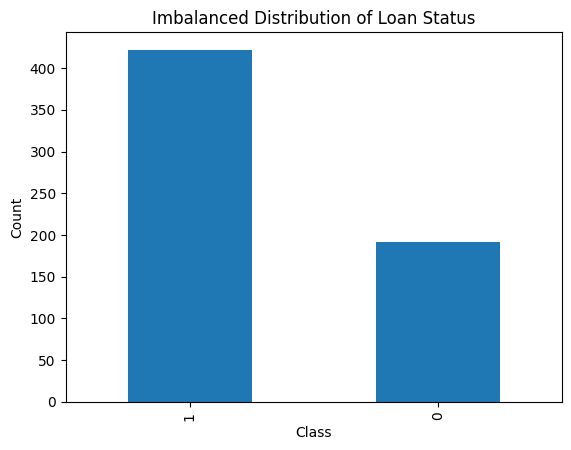

In [322]:
import matplotlib.pyplot as plt

df["Loan_Status1"].value_counts().plot(kind="bar")
plt.title("Imbalanced Distribution of Loan Status")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
